# Support Vector Machine (SVM): Ensemble Modeling + Data Deposit

**Notebook 4 of 4**<br>
<br>

## How to address variance in the data

One of the ways Random forests can help reduce variance and overfitting of SVM models is through Ensemble modelling. 
By creating an ensemble of SVM classifiers and averaging their probabilistic predictions, Random Forests reduce variance versus relying on individual models.

Addressing noise and variance with the use of other models:
Noise in data stems from the natural randomness and unceratinties that are inherently part of any complex real-world system or human behaviour being measured.  It includes random measurement errors, fluctuations due to unmeasured or immeasurable influences, and probabilistic outcomes even under tightly controlled conditions.

At the end of this tutorial, we will show you how to evaluate if you should publish a dataset. We will deposit a dataset from this tutorial series in Borealis (Dataverse), a repository that collects data sets published by researchers affiliated with Canadian universities.

Depositing or publishing your research data helps you to meet funder or journal publisher requirements, and in increases the impact and visibility of your research - as you can track how your dataset is reused around the world!



## Learning Objectives

Average time to complete: 10min

By the end of this tutorial you should be able to:

- Introduction to ensemble learning techniques to improve performance of machine learning models
- Deeper understanding of models
- Visualize how Random Forest classifier can improve the performance of SVM classifiers with noisy data.
- Publishing your data with a Digital Object Identifier (DOI).


Comment: The second objective needs explanation. Understandign of which model? 

## What you will need for this tutorial

* See the [introduction document](https://uottawa-it-research-teaching.github.io/machinelearning/) for general requirements and how Jupyter notebooks work.
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* We will use scikit learn as our machine learning package.
* numpy 
* seaborn 
* matplotlib
* requests
* ipywidgets
* The data files that should have come with this notebook.

## RDM best practices

Good data handling for machine learning begins with good Research Data Managment (RDM). The quality of your source data will impact the outcome of your results, just like the reproducibility of your results will depend on the quality of your data sources, in addition to how you organize the data so that other people (and machines!) can understand and reuse it.

We also need to respect a few research data management best practices along the way, these best practices are recommended by the [Digital Research Alliance of Canada](https://zenodo.org/records/4000989). In earlier tutorials, we encouraged you to resepct these RDM best practices:

SAVE YOUR RAW DATA IN ORIGINAL FORMAT<br>
BACKUP YOUR DATA (3-2-1 rule)<br>
DESCRIBE YOUR DATA

These practices should apply in this tutorial as well, but we will also look at best practices of data deposit, so that you can preserve your data set, share it with others, and get credit for your work!

PRESERVE AND SHARE YOUR DATA

* Submit final data files to a repository assigning a persistent identifier (e.g. handles or DOIs)
* Provide good metadata for your data set so others can find it (use a common metadata standard, e.g. Darwin Core, DDI, etc.)

**Data repositories** are platforms designed for storing, describing, sharing and citing research data. Often these repositories are organized around communities of interest, or as portals to an organization's datasets. Throughout this tutorial series you have explored many different data repositories: UCI Machine Learning Repository; Open Ottawa; Environment and Climate Change Canada: Historical Climate Data. 

In this tutorial, we will show you how to evaluate if you should publish a dataset and then, we will deposit a dataset from this tutorial series in Borealis (Dataverse), a repository that collects data sets published by researchers affiliated with Canadian universities.

Depositing or publishing your research data helps you to meet funder or journal publisher requirements, and in increases the impact and visibility of your research - as you can track how your dataset is reused around the world!



First, we import the libraries we need for this study

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

Let's create our synthetic datasets with intertwined circles and set up the training and test variables.

By running the code below, we can create two sets of synthetic data for binary classification tasks using concentric circles. Ite generatse the first dataset (X, y) using make_circles with 500 samples, a noise level of 0.1, and a factor of 0.62. This creates two concentric circles with some overlap due to noise .  thenWe create a second, similar dataset (X1, y1) with the same parameters, except for a higher noise level of 0.2. This will result in more overlapping between the two classe 3. We split the first dataset into training and test sets, with 80% of the data for training and 20% for testi 	4. We perform the same train-test split on the second, noisier dataset.

In [2]:
X, y = make_circles(n_samples=500, noise=0.1, factor=0.62, random_state=42) 
X1, y1 = make_circles(n_samples=500, noise=0.2, factor=0.62, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

We use the fit() fuction to train the two SVM classifiers

In [3]:
svm_classifier1 = SVC(kernel='rbf', C=1.0, probability=True) 

svm_classifier1.fit(X_train, y_train) 

svm_classifier2 = SVC(kernel='rbf', C=1.0, probability=True) 

svm_classifier2.fit(X_train1, y_train1) 

SVC(probability=True)

The code below sets up a Random Forest classifier using the same training data as generated above.

In [4]:

rf_classifier = RandomForestClassifier(n_estimators=56, random_state=42) 

rf_classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=56, random_state=42)

The code below uses the two previously trained SVM classifiers (svm_classifier1 and svm_classifier2) to make predictions on our test datasets.  svm_classifiero predicst the classes for the test set X_test from our first, less noisy dataset e svm_classifiero predisct the classes for the test set X_test1 from our second, noisier dataset.
This allows us to evaluate how well each SVM classifier performs on its respective test set. By comparing the predictions (svm_pred1 and svm_pred2) to the actual labels, we can assess the models' performance and how they handle different levels of noise in the day.

In [5]:

svm_pred1 = svm_classifier1.predict(X_test) 

svm_pred2 = svm_classifier2.predict(X_test1) 

By running the code below, we can use a previously trained Random Forest classifier (rf_classifier) to make predictions on a combined test set.


In [6]:
rf_pred = rf_classifier.predict(np.mean([X_test, X_test1], axis=0))

By running the code below, we can create an ensemble prediction by combining the outputs of our two SVM classifiers.

This ensemble approach allows us to leverage the strengths of both SVM models, potentially creating a more robust prediction that accounts for different noise levels in the data. By comparing these ensemble predictions (ensemble_pred) to the actual labels and to the individual model predictions, we can assess whether this combined approach offers any improvement in classification performance over the individual SVM models.

In [7]:
ensemble_pred = np.mean([svm_pred1, svm_pred2], axis=0).astype(int) 

This code calculates and compares the accuracy of different classifiers on our synthetic datasets. It computes the accuracy for SVM Classifier 1 on the less noisy data, SVM Classifier 2 on the noisier data, an ensemble combining both SVMs, and a Random Forest classifier on a combined test set. The accuracy scores are calculated by comparing the predicted labels to the true labels for each model. The ensemble and Random Forest accuracies are computed using the average of both test sets' labels. Finally, the code prints out the accuracy percentages for all four models, allowing us to directly compare their performance. This comparison helps us understand how each model handles different noise levels and whether the ensemble or Random Forest approach offers any advantages over individual SVM classifiers.

In [8]:
svm1_accuracy = accuracy_score(y_test, svm_pred1) 

svm2_accuracy = accuracy_score(y_test1, svm_pred2) 

ensemble_accuracy = accuracy_score(np.mean([y_test, y_test1], axis=0), ensemble_pred) 

rf_accuracy = accuracy_score(np.mean([y_test, y_test1], axis=0), rf_pred) 

print("Accuracy of SVM Classifier 1: {:.2f}%".format(svm1_accuracy * 100)) 

print("Accuracy of SVM Classifier 2: {:.2f}%".format(svm2_accuracy * 100)) 

print("Accuracy of Ensemble (SVM1 + SVM2): {:.2f}%".format(ensemble_accuracy * 100))

print("Accuracy of Random Forest: {:.2f}%".format(rf_accuracy * 100)) 

Accuracy of SVM Classifier 1: 95.00%
Accuracy of SVM Classifier 2: 83.00%
Accuracy of Ensemble (SVM1 + SVM2): 88.00%
Accuracy of Random Forest: 91.00%


We can see how Random Forest improved the accurace of the SVM ensemble.
Let's plot the decision boundaries 

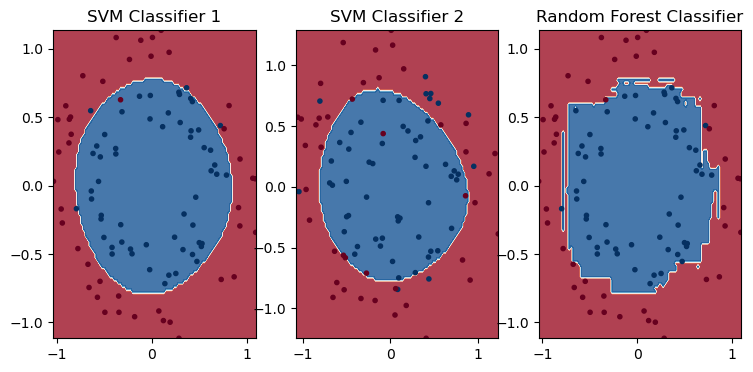

In [9]:
def plot_decision_boundary(model, X, y): 

    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 

                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100)) 

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu) 

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='.') 


plt.figure(figsize=(12, 4)) 

plt.subplot(141) 

plt.title("SVM Classifier 1") 

plot_decision_boundary(svm_classifier1, X_test, y_test) 

plt.subplot(142) 

plt.title("SVM Classifier 2") 

plot_decision_boundary(svm_classifier2, X_test1, y_test1) 

plt.subplot(143) 

plt.title("Random Forest Classifier") 

plot_decision_boundary(rf_classifier, X_test, y_test) 

By observing the decision boundaries, we notice how Random Forest does a better job at separating the red dots from the blue ones.

In this example, simple Ensemble modelling does provide some improvement in accuracy.  However, using Random Forest provide yet another advantage by it's averaging effect of the randomized trees which cancels out most of the noise in the dataset.

## Conclusion

The four SVM tutorial notebooks provided an interactive and visual introduction to Support Vector Machine classifiers. Notebook 1 covered the basics of SVMs using a synthetic dataset, including importing libraries, generating data, creating an SVM instance, tuning the regularization parameter C, and visualizing the model's decision boundary. Notebook 2 applied SVMs to an imbalanced pulsar dataset, leveraging the kernel trick and tuning C for better generalization. Notebook 3 explored linear and polynomial kernels for linearly and non-linearly separable data, mapping data to higher dimensions while using regularization to avoid overfitting. Notebook 4 discussed how ensemble methods like random forests can reduce variance and overfitting of SVM models by averaging predictions across multiple SVM classifiers. The interactive code, visualizations, and explanations provided hands-on experience with training, tuning, and interpreting SVM models on various datasets.

In the next section we will show you how to publish a dataset from this tutorial series. When you work with your own research data, you will know how to deposit your data for preservation, to meet funder or journal requirements, or so that your data can be reused!


## Where should I publish my data? 
 

**Data repositories** are platforms designed for storing, describing, sharing and citing research data. Often these repositories are organized around communities of interest, or as portals to an organization's datasets. Throughout this tutorial series you have already explored many different data repositories that enabled us to teach you these ML models: 

* Open Ottawa
* Environment and Climate Change Canada: Historical Climate Data
* UCI Machine Learning Repository

The first two repositories on this list are **municipal and federal government repositories** that share data from govenrment agencies with the public. The third repository is a **discipline specific repository** sharing data to the machine learning research and development community. We will now introduce you to Borealis (Dataverse) https://borealisdata.ca/  a **consortial repository** that provides data deposit services to all members of affiliated academic institutions in Canada, so that their research data can be shared with the world. 

Researchers publish data sets because: 

* altruism: to share their data so new research and teaching can be done
* reproducibility: to share their data so the research can be verified and validated
* journal requirements to publish data in support of a peer-reviewed article
* funder requirements: public funding bodies may favour open science approaches, including open data 
* citation & credit: recognition for their research contributions through data citations 

### Publishing your data

**What is our research data?** 

It is an RDM best practice to inventory the many types of data produced in a project. Make sure you differentiate between:
* research data (data that is collected and analyzed to publish results), 
* secondary source data (data reused from other sources); and 
* administrative  data (data that helps you manage budgets or you project teams, etc) 

This tutorial series includes three kinds of research data: 

1. Spreadsheets (.csv, .xlsx, .tsv)
2. Jupyter notebooks and code (.ipynb)
3. ReadMe.txt file (documentation of the data set and methodologies that produced it)

In this tutorial we will show you how to evaluate, prepare, and deposit all three different categories of research data into Borealis (Dataverse). Keep in mind that this section is written from the persepctive of the project team as the data set creators, and you are the data set user. You will have to apply these principles to your own research data when you are working on your own projects. 

### What data can we deposit?
**1. Spreadsheets (.csv, .xlsx, .tsv)** 

Borealis (Dataverse) has terms of use [https://learn.scholarsportal.info/all-guides/borealis/] that require all deposted data: 

* Are anonymized, and that any sensitive or personally identifiable information is removed.  
* If the dataset includes secondary data, you have the proper permissions to share the dataset.  

None of the datasets in our tutorials include sensitive data that has privacy restrictions. 
For each dataset that the project team used from another source (a secondary source) we must ask, does the project team have the ownership of the data, or is it open data? 

*You may wonder why the research team must assign a license to their data to make them open. Are data even protected by copyright? Because copyright protects the original expression of ideas or facts fixed in a tangible medium, it’s easy to conclude that data are like facts, so not protected. Indeed, raw or factual data that are not interpreted generally do not enjoy copyright protection. However, a compilation of data can be protected because of the judgment, skill, or effort applied when determining which data to include and/or their arrangement (making the data an “original expression”). Also, if the data are literary, musical, dramatic, or artistic works, they can be protected by copyright.* From [Research Data management in the Canadian Context, Chapter 12 https://ecampusontario.pressbooks.pub/canadardm/chapter/planning-for-open-science-workflows/] 

**Here is an inventory of all the spreadsheet data sets that were used in these tutorials, and an evaluation of why the project team can or cannot deposit them.**

|Tutorial | Data set file | Is obtained from another source ? | Is it open data? | Do we have ownership? | Can we publish? | Notes |
| ------------- | ------------- | ------------- | ------------ | ------------- |------------- | ------------- |
| Cleaning and Regression |MLTS_20240530_DCRF_Bike_Counter_1.0.xlsx |Yes, government repository | yes | no | no | Best practice is not to republish an open dataset that is avaialble in another repository |
|    | MLTS_20240530_DCRF_Climate_Data_2020_P1D_EN_1.0.csv | Yes, government repository | yes | no | no | Best practice is not to republish an open dataset that is avaialble in another repository |
|   | MLTS_20240530_DCRF_Climate_Data_2019_P1D_EN_1.0.csv | Yes, government repository| yes | no | no | Best practice is not to republish an open dataset that is avaialble in another repository |
| Decision Trees + Random Forest | MLTS_20240530_DTRF_iris_flower_feature_measurements_1.0.csv | Yes, institutional repository| yes | no | no | Best practice is not to republish an open dataset that is avaialble in another repository |
|    | **MLTS_20240530_DTRF_DataBikeAndWeather2020_1.0.csv** | **multiple sources were combined** | **yes** | **yes** |**yes**| **This is a combined data set from multiple open data sets. An original data set is created by combining multiple open data sets, this means it has new research value and you have ownership and the right to share it is unique in its combination of the data.**|
| Naive Bayes | MLTS_20240530_NB_SMSSpamCollection_1.0.tsv | yes, institutional | CC-BY | no | no | Best practice is not to republish a Creative Commons licensed dataset that is avaialble in another repository |
|   | MLTS_20240530_NB_booksummaries_1.0.txt | yes, institutional repostory | CC-BY |no| no | Best practice is not to republish a Creative Commons licensed dataset that is avaialble in another repository |
|  | MLTS_20240530_NB_school_demographics_1.0.xlsx | yes, government repository | yes | no | no | Best practice is not to republish an open dataset that is available in another repository |
| Suport Vector machines (SVM) | MLTS_20240530_SVM_pulsar_stars_1.0.csv | Yes, institutional repository | yes | no | no | Best practice is not to republish an open dataset that is available in another repository |

### Conclusion

The only suitable research data set for the project team to deposit in Borealis (Dataverse) is **MLTS_20240530_DTRF_DataBikeAndWeather2020_1.0.csv** 

You will remember that in the Decision Trees + Random Forest Tutorial, we augmented an existing open data set of bicycle routes in the City of Ottawa, by adding data points representing historical weather conditions, dowloaded from other open data repositories: Environment and Climate Change Canada. This means that the project team created something "new" in our compilation of data points, *a compilation of data can be protected because of the judgment, skill, or effort applied when determining which data to include and/or their arrangement (making the data an “original expression”).* An original data set is created by combining multiple open data sets, following RDM best practices, these new variables have been labled in our combined dataset with clear names: "hours of daylight (hrs)", "UV Index", "holiday","weekday", "humidity".  We also converted the file to .csv because it is an open file format. This means the compilation of data has new research value and the project team has ownership and the right to share it. 

This combined data set from multiple open data sets can be published by the project team, and licensed with an open data licence in Borealis (Dataverse).


**2. Why we chose Dataverse (Borealis)**

A repository that provides a free data deposit services to all members of affiliated academic institutions in Canada, so that their research data can be shared with the world. You have options to license your data isn different ways, and promote reuse through an open license. Preservation of the dataset in ensureed for as long as the platform can be migrated and maintained. The matadata fields that descibe the data set meet RDM best practices, this means it is hightly visible in search engines, and you can track the usage statistics for the citation of your dataset. 
 
Best of all, there is Git Hub itegration for to assign a DOI to your dataset. A DOI is a universal identifier that creates a permanent link to your dataset for citation and reuse in other platforms. 
 
5. Borealis offers several deposit options : https://learn.scholarsportal.info/all-guides/borealis/
Files can be manually uploaded, or a GitHub repository can be automated as a batch upload and everytime there is a new version pushed to the GitHub repositoy main, it will automatically update the version in Borealis https://github.com/marketplace/actions/dataverse-uploader-action
You can see how we deposited our data set here, you are now linking to it using the DOI!!! [link to DOI]

6. Importance of README files

RDM best practices are to include a README file with your data deposit in Borealis. This is like a "cipher key" that unlocks your research data for reuse by furture users. It should include description of all files, relation to eachother, explanation of versions, methodology of data collection, explanation of variables, author, ownership and licensing information. 

BONUS file naming structure section 

This training followed the RDM file naming best practices to increase the discoverability of our data. To name our files we use the acronym of training as follows:

Machine Learning Tutorial Series (MLTS): Data Cleaning and Linear Regression (DCRF), Decision Trees and Random Forests (DTRF), Support Vector Machines (SVM), Naive Bayes (NB).

We implemented the following pattern for the file naming:  image

Project_date_AbbreviationofRelevantTraining_ContentDescription_Languageversion_Version.ext

We can ALSO publish our jupyter/code

